In [ ]:
pip install opencv-python pandas seaborn

Note: you may need to restart the kernel to use updated packages.


### Setup

In [2]:
import pandas as pd
from IPython.display import display 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import cv2
import os
import seaborn as sns
from datetime import datetime


### Creating datapaths

##### Vídeo 1

In [ ]:
path= r"G:\Meu Drive\Meu projeto\csv_analise\top\neutro\Fiona_d17_teste_door(object2)_1DLC_Resnet50_top_viewMay29shuffle1_snapshot_110.csv"
df = pd.read_csv(path, header=[1, 2])

video_path = r"G:\Meu Drive\Meu projeto\csv_analise\top\neutro\Fiona_d17_teste_door(object2)_1.mp4"
cap = cv2.VideoCapture(video_path) 

stim_timestamps = r"G:\Meu Drive\Meu projeto\csv_analise\top\neutro\Fiona_d17_teste_door(object2)_stim_ON_OFF_timestamps.csv"
stim_df = pd.read_csv(stim_timestamps, header=[0])

In [4]:
stim_df

,stim_ON,stim_OFF
0,180.000314,200.001720
1,360.001893,380.001945
2,540.002062,560.002174
3,720.002813,740.003148


##### Vídeo 2

In [5]:
path2 = r"G:\Meu Drive\Meu projeto\csv_analise\top\neutro\Fiona_Obj.Neutro(lata)_11_06_25DLC_Resnet50_top_viewMay29shuffle1_snapshot_110.csv"
df2 = pd.read_csv(path, header=[1, 2])

video_path2 = r"G:\Meu Drive\Meu projeto\csv_analise\top\neutro\Fiona_Obj.Neutro(lata)_11_06_25_1.mp4"
cap2 = cv2.VideoCapture(video_path) 

stim_timestamps2 = r"G:\Meu Drive\Meu projeto\csv_analise\top\neutro\Fiona_Obj.Neutro(lata)_11_06_25_stim_ON_OFF_timestamps.xls - Fiona_Obj.Neutro(lata)_11_06_25_stim_ON_OFF_timestamps.xls.csv"
stim_df2 = pd.read_csv(stim_timestamps, header=[0])

In [6]:
stim_df2

,stim_ON,stim_OFF
0,180.000314,200.001720
1,360.001893,380.001945
2,540.002062,560.002174
3,720.002813,740.003148


### Dataframe segmentation

In [7]:
def get_seg(df, on, off, fps=30, i=0):
    start_sec = on[i]
    end_sec = off[i]
        
    start_frame = start_sec * fps
    end_frame = end_sec * fps
        
    segmento = df[(df.index >= start_frame) & (df.index <= end_frame)]

    return segmento

##### Baseline

In [9]:
baseline_on = stim_df['stim_ON'] - 20 
baseline_off = stim_df['stim_ON']    

baseline_df = pd.DataFrame({
    'baseline_ON': baseline_on,
    'baseline_OFF': baseline_off
})

display(baseline_df)

,baseline_ON,baseline_OFF
0,160.000314,180.000314
1,340.001893,360.001893
2,520.002062,540.002062
3,700.002813,720.002813


In [10]:
baseline1 = get_seg(df, baseline_df['baseline_ON'], baseline_df['baseline_OFF'], fps=30, i=0)
baseline2 = get_seg(df, baseline_df['baseline_ON'], baseline_df['baseline_OFF'], fps=30, i=1)
baseline3 = get_seg(df, baseline_df['baseline_ON'], baseline_df['baseline_OFF'], fps=30, i=2)
baseline4 = get_seg(df, baseline_df['baseline_ON'], baseline_df['baseline_OFF'], fps=30, i=3)
baseline5 = get_seg(df2, baseline_df['baseline_ON'], baseline_df['baseline_OFF'], fps=30, i=0)
baseline6 = get_seg(df2, baseline_df['baseline_ON'], baseline_df['baseline_OFF'], fps=30, i=1)
baseline7 = get_seg(df2, baseline_df['baseline_ON'], baseline_df['baseline_OFF'], fps=30, i=2)
baseline8 = get_seg(df2, baseline_df['baseline_ON'], baseline_df['baseline_OFF'], fps=30, i=3)

baseline1_sorted = baseline1.sort_index()
baseline2_sorted = baseline2.sort_index()
baseline3_sorted = baseline3.sort_index()
baseline4_sorted = baseline4.sort_index()
baseline5_sorted = baseline5.sort_index()
baseline6_sorted = baseline6.sort_index()
baseline7_sorted = baseline7.sort_index()
baseline8_sorted = baseline8.sort_index()

stims_array = np.stack([
    baseline1_sorted.values,
    baseline2_sorted.values,
    baseline3_sorted.values,
    baseline4_sorted.values,
    baseline5_sorted.values,
    baseline6_sorted.values,
    baseline7_sorted.values,
    baseline8_sorted.values
])

mean_rows = np.mean(stims_array, axis=0)

df_seg_baseline = pd.DataFrame(mean_rows, columns=baseline1_sorted.columns)


In [11]:
all_segments_values = []

tasks = {
    'df1': (df, range(4)),   
    'df2': (df2, range(4))  
}

for data_key, (current_df, indices) in tasks.items():
    for i in indices:
        segment = get_seg(current_df, baseline_df['baseline_ON'], baseline_df['baseline_OFF'], fps=30, i=i)
        
        sorted_segment = segment.sort_index()
        all_segments_values.append(sorted_segment.values)

stims_array = np.stack(all_segments_values)
mean_rows = np.mean(stims_array, axis=0)
df_seg_baseline = pd.DataFrame(mean_rows, columns=sorted_segment.columns)

In [12]:
df_seg_baseline

bodyparts        nose                           forehead              \
       coords           x           y likelihood           x           y   
0     12901.0  254.539305  345.047903   0.286780  264.985085  263.512295   
1     12902.0  254.322423  344.872295   0.290893  267.059262  263.309552   
2     12903.0  254.466115  345.207193   0.295352  267.109593  263.199437   
3     12904.0  254.361713  345.189405   0.292181  267.149795  263.216545   
4     12905.0  254.399777  345.354635   0.296688  267.030990  263.271965   
..        ...         ...         ...        ...         ...         ...   
595   13496.0  274.843080  231.082711   0.455603  288.302320  430.724598   
596   13497.0  286.815980  432.195445   0.411595  288.313497  430.876667   
597   13498.0  286.079560  433.278017   0.424553  287.948570  430.547195   
598   13499.0  284.673563  433.568670   0.486437  288.661195  432.036362   
599   13500.0  285.492583  433.983505   0.472979  289.762830  433.003980   

                     R_ear                         ...      L_ear        head  \
    likelihood           x           y likelihood  ... likelihood           x   
0     0.557731  241.909877  350.063740   0.406508  ...   0.530597  331.715532   
1     0.557514  241.980523  350.258777   0.404992  ...   0.529745  331.662945   
2     0.549100  241.960800  350.172275   0.403086  ...   0.538618  331.405213   
3     0.550073  242.012297  350.274795   0.397621  ...   0.542969  331.539775   
4     0.556456  241.994518  349.977360   0.405131  ...   0.552478  331.408257   
..         ...         ...         ...        ...  ...        ...         ...   
595   0.625839  234.392600  351.183870   0.438638  ...   0.518754  347.167098   
596   0.608558  264.412650  232.602575   0.449448  ...   0.526709  346.903633   
597   0.623373  293.062728  421.716017   0.406940  ...   0.510933  346.343407   
598   0.641794  244.587925  341.561245   0.454642  ...   0.546317  346.086187   
599   0.649294  244.603843  342.255587   0.458563  ...   0.578903  292.822615   

                                  body                               tail  \
              y likelihood           x           y likelihood           x   
0    343.069135   0.507298  385.720435  428.165135   0.336109  245.566405   
1    342.974180   0.509542  385.880195  428.076390   0.327021  318.022208   
2    343.383655   0.498244  481.022738  421.579557   0.330293  404.829665   
3    343.094523   0.504840  461.444398  459.300060   0.346503  318.107415   
4    342.786305   0.517054  446.839820  408.570570   0.354492  403.412643   
..          ...        ...         ...         ...        ...         ...   
595  511.991283   0.547366  568.505183  507.772405   0.326176  228.364683   
596  510.988322   0.550325  587.066510  469.159315   0.315057  356.225897   
597  510.491857   0.519809  570.163350  484.296820   0.325620  408.681820   
598  509.887175   0.543069  574.461425  396.437175   0.329470  408.652242   
599  433.931958   0.553391  468.823100  461.736545   0.320149  292.343482   

                            
              y likelihood  
0    279.146610   0.205083  
1    305.058978   0.185424  
2    364.243162   0.200478  
3    304.988235   0.189331  
4    392.129230   0.176928  
..          ...        ...  
595  337.134608   0.276062  
596  402.701990   0.245069  
597  363.354067   0.234840  
598  363.381898   0.254139  
599  368.835173   0.262028  

[600 rows x 22 columns]

##### Stim window

In [13]:
all_segments_values = []

tasks = [
    (df, stim_df, 4),
    (df2, stim_df2, 4)
]

for tracking_df, stimulus_df, num_segments in tasks:
    for i in range(num_segments):
        segment = get_seg(tracking_df, stimulus_df['stim_ON'], stimulus_df['stim_OFF'], fps=30, i=i)
        sorted_segment = segment.sort_index()
        all_segments_values.append(sorted_segment.values)

stims_array = np.stack(all_segments_values)

mean_rows = np.mean(stims_array, axis=0)

df_seg_stim = pd.DataFrame(mean_rows, columns=sorted_segment.columns)

In [14]:
df_seg_stim

bodyparts        nose                           forehead              \
       coords           x           y likelihood           x           y   
0     13501.0  287.711495  432.730730   0.361116  290.515270  432.887970   
1     13502.0  222.852703  339.485842   0.408012  290.586150  433.015683   
2     13503.0  246.060088  346.845222   0.310480  295.776983  435.384365   
3     13504.0  233.253035  338.552705   0.219691  347.089378  513.363475   
4     13505.0  245.723425  334.161323   0.219780  349.884118  513.068903   
..        ...         ...         ...        ...         ...         ...   
595   14096.0  307.816495  348.691870   0.210647  359.063123  429.468363   
596   14097.0  297.184798  363.610503   0.227138  357.132465  430.984450   
597   14098.0  309.450215  360.018838   0.208961  358.850740  431.454275   
598   14099.0  313.139955  352.899545   0.201538  360.968040  433.545245   
599   14100.0  313.830732  353.660975   0.201137  364.517392  433.640873   

                     R_ear                         ...      L_ear        head  \
    likelihood           x           y likelihood  ... likelihood           x   
0     0.586388  242.873810  439.390700   0.410875  ...   0.558302  288.076110   
1     0.644159  297.659545  423.799792   0.421539  ...   0.588147  292.656282   
2     0.580756  293.800932  435.208632   0.396545  ...   0.433641  351.522475   
3     0.483467  287.094985  416.217393   0.390019  ...   0.460544  346.522225   
4     0.493938  295.970370  414.309807   0.429337  ...   0.513659  348.150463   
..         ...         ...         ...        ...  ...        ...         ...   
595   0.569907  267.618928  430.924273   0.501158  ...   0.514706  358.499878   
596   0.568225  267.927800  431.131048   0.516257  ...   0.493108  355.876142   
597   0.550937  269.297550  431.956357   0.496859  ...   0.477660  355.457673   
598   0.585399  269.549313  432.227730   0.447002  ...   0.404494  355.912647   
599   0.597479  269.170907  432.530808   0.445611  ...   0.411452  356.566020   

                                  body                               tail  \
              y likelihood           x           y likelihood           x   
0    439.169242   0.538480  586.527118  470.346505   0.330803  292.907202   
1    439.018253   0.533552  432.358867  442.216453   0.375575  219.032957   
2    514.595100   0.498659  568.089300  508.016948   0.340559  312.383340   
3    514.123568   0.576492  441.684876  466.908670   0.364661  311.653175   
4    514.921085   0.541548  586.296465  470.225172   0.353361  511.440787   
..          ...        ...         ...         ...        ...         ...   
595  426.953270   0.632068  569.189208  428.111183   0.376187  389.696916   
596  427.058638   0.645632  584.029942  478.385913   0.378111  390.313998   
597  428.719380   0.648000  583.720365  478.736975   0.382933  203.875971   
598  428.470315   0.570479  583.463597  478.429393   0.380216  249.230476   
599  428.316985   0.536793  583.668935  478.264297   0.401707  392.301850   

                            
              y likelihood  
0    368.549298   0.270786  
1    363.129605   0.232500  
2    430.265145   0.177191  
3    430.461042   0.218011  
4    417.459183   0.184774  
..          ...        ...  
595  375.953498   0.128418  
596  430.411158   0.126912  
597  280.599845   0.149392  
598  359.548612   0.120588  
599  391.578260   0.141266  

[600 rows x 22 columns]

### Box area selection

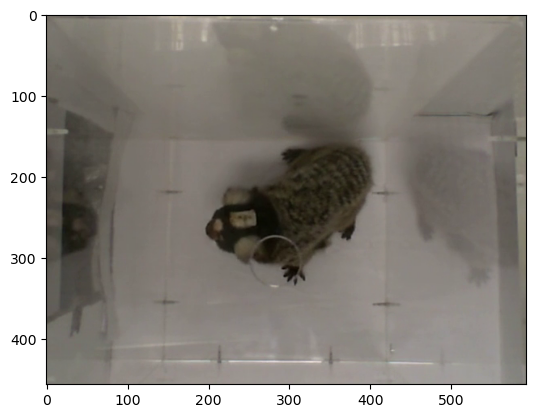

In [15]:
cap = cv2.VideoCapture(video_path) 
numOfFrames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
chosenFrameIdx = np.random.randint(1, high=numOfFrames)
cap.set(cv2.CAP_PROP_POS_FRAMES, chosenFrameIdx)
res, chosenFrame = cap.read()

original_height, original_width, _ = chosenFrame.shape
display_max_width = 700
ratio = display_max_width / original_width
display_height = int(original_height * ratio)

frame_for_selection = cv2.resize(chosenFrame, (display_max_width, display_height))

roi_small = cv2.selectROI('Select the arena, then press space and enter', frame_for_selection) 

x_scale = original_width / display_max_width
y_scale = original_height / display_height

roi_original_scale = (
    int(roi_small[0] * x_scale),
    int(roi_small[1] * y_scale),
    int(roi_small[2] * x_scale),
    int(roi_small[3] * y_scale)
)

roi_cropped = chosenFrame[int(roi_original_scale[1]):int(roi_original_scale[1]+roi_original_scale[3]), int(roi_original_scale[0]):int(roi_original_scale[0]+roi_original_scale[2])]
plt.imshow(cv2.cvtColor(roi_cropped, cv2.COLOR_BGR2RGB))
plt.show()

cv2.waitKey(0) 
cv2.destroyAllWindows()

arenaSide = (roi_original_scale[2] + roi_original_scale[3]) / 2 
xThresholdLeft = roi_original_scale[0]
xThresholdRight = roi_original_scale[0] + arenaSide
yThresholdUp = roi_original_scale[1]
yThresholdDown = roi_original_scale[1] + arenaSide

### Convert pixel to cm

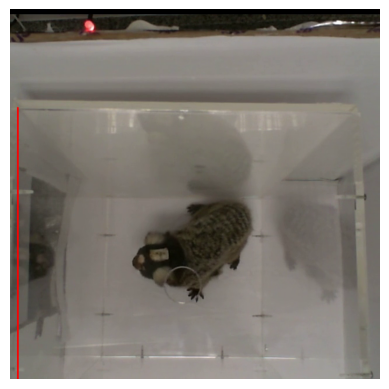

Pixels per cm: 20.192307692307693


In [16]:
py1 = yThresholdDown 
py2 = yThresholdUp
px = xThresholdLeft

frame_with_line = chosenFrame.copy()
cv2.line(frame_with_line, (px, int(py1)), (px, int(py2)), (0, 0, 255), 2)  
frame_with_line_rgb = cv2.cvtColor(frame_with_line, cv2.COLOR_BGR2RGB)
plt.imshow(frame_with_line_rgb)
plt.axis('off') 
plt.show()

pix_per_cm = (py1-py2) / 26 # 26 cm é a distância entre os dois pontos
print(f"Pixels per cm: {pix_per_cm}")

### Filter coordinates

##### Function

In [17]:
def process_tracking_data(df, bodyparts, thresholds, pix_per_cm, window_size=59):
    df_processed = df.copy()

    for part in bodyparts:
        x_coords = df_processed[(part, 'x')]
        y_coords = df_processed[(part, 'y')]
        x_filt = np.where((x_coords >= thresholds['x_min']) & (x_coords <= thresholds['x_max']), x_coords, np.nan)
        y_filt = np.where((y_coords >= thresholds['y_min']) & (y_coords <= thresholds['y_max']), y_coords, np.nan)

        df_processed[(part, 'x')] = x_filt / pix_per_cm
        df_processed[(part, 'y')] = y_filt / pix_per_cm

    columns_to_check = [(part, coord) for part in bodyparts for coord in ['x', 'y']]
    df_processed.dropna(subset=columns_to_check, inplace=True)

    df_smoothed = df_processed[columns_to_check].rolling(window=window_size, min_periods=1, center=True).mean()

    return df_smoothed

##### Results

In [18]:
bodyparts = ['body', 'head', 'nose']
thresholds = {
    'x_min': xThresholdLeft, 
    'x_max': xThresholdRight,
    'y_min': yThresholdUp,
    'y_max': yThresholdDown
} 

df_baseline = process_tracking_data(
    df=df_seg_baseline,
    bodyparts=bodyparts,
    thresholds=thresholds,
    pix_per_cm=pix_per_cm,
    window_size=59
)

df_stim = process_tracking_data(
    df=df_seg_stim,
    bodyparts=bodyparts,
    thresholds=thresholds,
    pix_per_cm=pix_per_cm,
    window_size=59
)

head_x_base = df_baseline[('head', 'x')].values
head_y_base = df_baseline[('head', 'y')].values
nose_x_base = df_baseline[('nose', 'x')].values
nose_y_base = df_baseline[('nose', 'y')].values
body_x_base = df_baseline[('body', 'x')].values
body_y_base = df_baseline[('body', 'y')].values

head_x_stim = df_stim[('head', 'x')].values
head_y_stim = df_stim[('head', 'y')].values     
nose_x_stim = df_stim[('nose', 'x')].values
nose_y_stim = df_stim[('nose', 'y')].values
body_x_stim = df_stim[('body', 'x')].values
body_y_stim = df_stim[('body', 'y')].values

display(df_baseline)
display(df_stim)

body                  head                  nose           
             x          y          x          y          x          y
0    22.169480  21.231823  15.817050  16.735597  13.187822  15.673050
1    22.219030  21.368536  15.903527  16.896320  13.289753  15.702392
2    22.064273  21.287378  16.088375  17.161851  13.403546  15.716556
3    21.887911  21.458491  16.190062  17.263202  13.506623  15.748270
4    21.850031  21.616654  16.282399  17.354987  13.604454  15.778040
..         ...        ...        ...        ...        ...        ...
590  22.062313  22.870874  17.476233  20.072389  13.651102  14.766921
591  22.053687  22.920667  17.585658  20.339062  13.642321  14.852137
592  22.001849  22.842424  17.530001  20.323811  13.650737  14.952658
593  21.947452  22.759520  17.471813  20.308485  13.648373  15.058463
599  21.858133  22.732398  17.424060  20.279690  13.643072  15.173277

[329 rows x 6 columns]

body                  head                  nose           
             x          y          x          y          x          y
1    21.785887  22.785374  17.686260  19.721634  15.261746  16.558755
3    21.815892  22.778092  17.595386  19.626672  15.150301  16.595165
6    21.591656  22.873984  17.528975  19.521394  15.133908  16.755765
7    21.648777  22.942904  17.441698  19.456959  15.115067  16.912912
12   21.675549  22.858235  17.359281  19.396629  15.094260  17.056396
..         ...        ...        ...        ...        ...        ...
576  22.924059  19.060290  18.700434  22.133460  13.706852  15.730006
577  22.888224  19.137853  18.780642  22.308819  13.733819  15.809208
578  22.845887  19.217233  18.857454  22.509466  13.757899  15.907707
580  22.803053  19.303989  18.940806  22.721155  13.782581  16.011867
581  22.757349  19.393752  18.924049  22.776308  13.805636  16.084377

[249 rows x 6 columns]

### Distance traveled

In [19]:
def calcular_distancia(df, bodypart='body'):
    x = df[(bodypart, 'x')].values
    y = df[(bodypart, 'y')].values
    dx = np.diff(x)
    dy = np.diff(y)
    dist = np.sqrt(dx**2 + dy**2)
    return np.nansum(dist)

distancia_baseline = calcular_distancia(df_baseline)
distancia_stim = calcular_distancia(df_stim)

print(f"Distância percorrida (baseline): {distancia_baseline:.2f} cm")
print(f"Distância percorrida (stim): {distancia_stim:.2f} cm")

Distância percorrida (baseline): 31.48 cm
Distância percorrida (stim): 19.97 cm


### Head velocity

##### Functions

In [20]:
def ang_vel(head_x, head_y, nose_x, nose_y, fps):
    dx = nose_x - head_x
    dy = nose_y - head_y
    ang_rad = np.arctan2(dy, dx)
    
    delta_ang = np.diff(ang_rad)
    delta_ang = np.where(delta_ang > np.pi, delta_ang - 2 * np.pi, delta_ang)
    delta_ang = np.where(delta_ang < -np.pi, delta_ang + 2 * np.pi, delta_ang)
    
    vrad_s = delta_ang / (1 / fps)

    vrad_s = np.insert(vrad_s, 0, 0)

    vdeg_s = np.degrees(vrad_s)
    
    return vdeg_s

In [ ]:
import numpy as np

def ang_vel_mag(head_x, head_y, nose_x, nose_y, fps):
  dx = nose_x - head_x
  dy = nose_y - head_y
  ang_rad = np.arctan2(dy, dx)
  
  delta_ang = np.diff(ang_rad)
  delta_ang = np.where(delta_ang > np.pi, delta_ang - 2 * np.pi, delta_ang)
  delta_ang = np.where(delta_ang < -np.pi, delta_ang + 2 * np.pi, delta_ang)
  
  vrad_s = delta_ang / (1 / fps)
  vrad_s = np.insert(vrad_s, 0, 0)
  vdeg_s = np.degrees(vrad_s)
  
  return np.abs(vdeg_s)

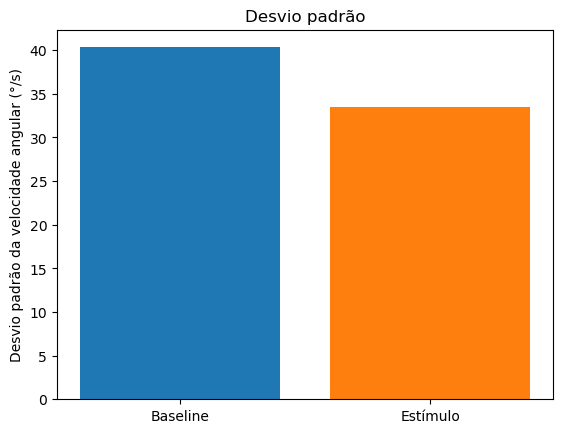

In [22]:
fps = 30

stim_v = ang_vel_mag(head_x_stim, head_y_stim, nose_x_stim, nose_y_stim, fps)
base_v = ang_vel_mag(head_x_base, head_y_base, nose_x_base, nose_y_base, fps)

stds = [np.std(base_v), np.std(stim_v)]
labels = ['Baseline', 'Estímulo']

plt.bar(labels, stds, color=['tab:blue', 'tab:orange'])
plt.ylabel('Desvio padrão da velocidade angular (°/s)')
plt.title('Desvio padrão')
plt.show()

In [23]:
fps = 30

stim_v = ang_vel_mag(head_x_stim, head_y_stim, nose_x_stim, nose_y_stim, fps)
base_v = ang_vel_mag(head_x_base, head_y_base, nose_x_base, nose_y_base, fps)

display(np.std(stim_v))
display(np.std(base_v))

33.54604446354509

40.33390318258192

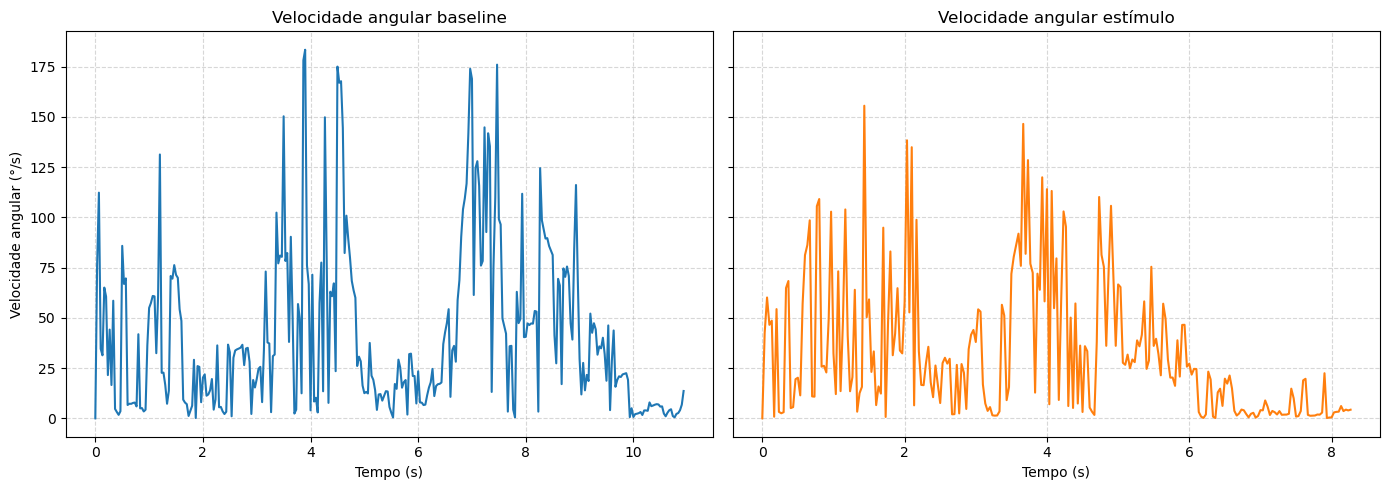

In [24]:
fps = 30

tempo_stim = np.arange(len(stim_v)) / fps
tempo_base = np.arange(len(base_v)) / fps

fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

axs[0].plot(tempo_base, base_v, color='tab:blue')
axs[0].set_title('Velocidade angular baseline')
axs[0].set_xlabel('Tempo (s)')
axs[0].set_ylabel('Velocidade angular (°/s)')
axs[0].grid(True, linestyle='--', alpha=0.5)

axs[1].plot(tempo_stim, stim_v, color='tab:orange')
axs[1].set_title('Velocidade angular estímulo')
axs[1].set_xlabel('Tempo (s)')
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

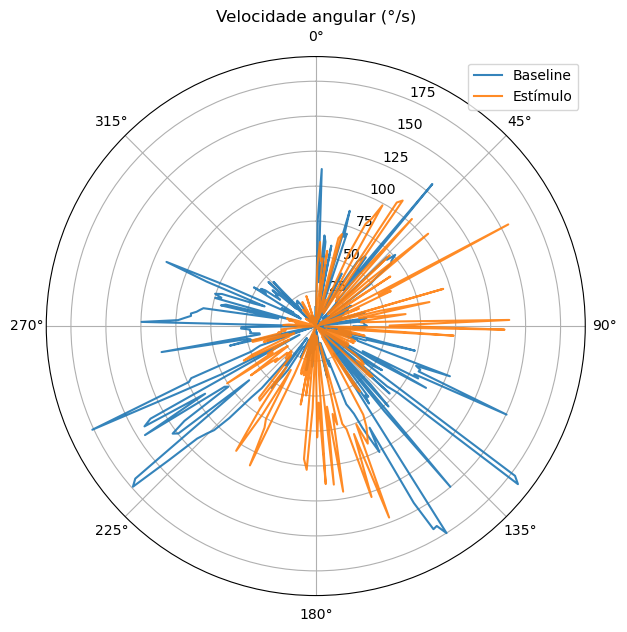

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7), subplot_kw={'projection': 'polar'})

# Ângulos para o plot polar (em radianos)
angles_stim = np.linspace(0, 2 * np.pi, len(stim_v), endpoint=False)
angles_base = np.linspace(0, 2 * np.pi, len(base_v), endpoint=False)

# Plot das velocidades angulares no polar
ax.plot(angles_base, np.abs(base_v), label='Baseline', color='tab:blue', alpha=0.9)
ax.plot(angles_stim, np.abs(stim_v), label='Estímulo', color='tab:orange', alpha=0.9)

ax.set_title('Velocidade angular (°/s)')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.legend(loc='upper right')
plt.show()

In [26]:
fps = 30

stim_v = ang_vel_mag(head_x_stim, head_y_stim, nose_x_stim, nose_y_stim, fps)
base_v = ang_vel_mag(head_x_base, head_y_base, nose_x_base, nose_y_base, fps)
mean_base_v = np.mean(base_v)
mean_stim_v = np.mean(stim_v)

print(f"Velocidade angular média (baseline): {mean_base_v:.2f} °/s")
print(f"Velocidade angular média (estímulo): {mean_stim_v:.2f} °/s")

Velocidade angular média (baseline): 40.94 °/s
Velocidade angular média (estímulo): 32.66 °/s


In [27]:
def calcular_velocidade_media(df, bodypart='body', fps=30):
    x = df[(bodypart, 'x')].values
    y = df[(bodypart, 'y')].values
    dx = np.diff(x)
    dy = np.diff(y)
    dist = np.sqrt(dx**2 + dy**2)
    tempo_total = len(x) / fps
    velocidade_media = np.nansum(dist) / tempo_total
    return velocidade_media

velocidade_media_baseline = calcular_velocidade_media(df_baseline, bodypart='body', fps=30)
velocidade_media_stim = calcular_velocidade_media(df_stim, bodypart='body', fps=30)

print(f"Velocidade média do corpo (baseline): {velocidade_media_baseline:.2f} cm/s")
print(f"Velocidade média do corpo (estímulo): {velocidade_media_stim:.2f} cm/s")

Velocidade média do corpo (baseline): 2.87 cm/s
Velocidade média do corpo (estímulo): 2.41 cm/s
